In [3]:
!pip install kaggle

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d fusicfenta/chest-xray-for-covid19-detection

chest-xray-for-covid19-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!ls

chest-xray-for-covid19-detection.zip  Dataset  kaggle.json  sample_data


In [11]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/chest-xray-for-covid19-detection.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [12]:
!ls

chest-xray-for-covid19-detection.zip  Dataset  kaggle.json  sample_data


In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import keras
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import cv2
from sklearn.metrics import confusion_matrix
import itertools

In [15]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(256,256,3)))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

model.compile(loss='binary_crossentropy',optimizer = "adam",metrics=["accuracy"])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 126, 126, 64)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                   

In [17]:
train = '/content/Dataset/Train'
validation = '/content/Dataset/Val'
prediction = '/content/Dataset/Prediction'

In [18]:
gen= image.ImageDataGenerator(
    rescale=1./255.,
    horizontal_flip = True,
    shear_range=0.2,
    zoom_range=0.2,
)
test_dataset=image.ImageDataGenerator(rescale=1/255)

In [19]:
train_generator = gen.flow_from_directory(
    directory = '/content/Dataset/Train',
    color_mode="rgb",
    target_size = (256,256), # image height , image width
    class_mode="binary",
    batch_size=16,
    shuffle=True
)
class_names=['covid-19','normal']

Found 288 images belonging to 2 classes.


In [20]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [21]:
validation_generator = gen.flow_from_directory(
    directory = '/content/Dataset/Val',
    color_mode="rgb",
    target_size = (256,256), # image height , image width
    class_mode="binary",
    batch_size=16,
    shuffle=True,
)
class_names=['covid-19','normal']

Found 60 images belonging to 2 classes.


Found 288 files belonging to 2 classes.


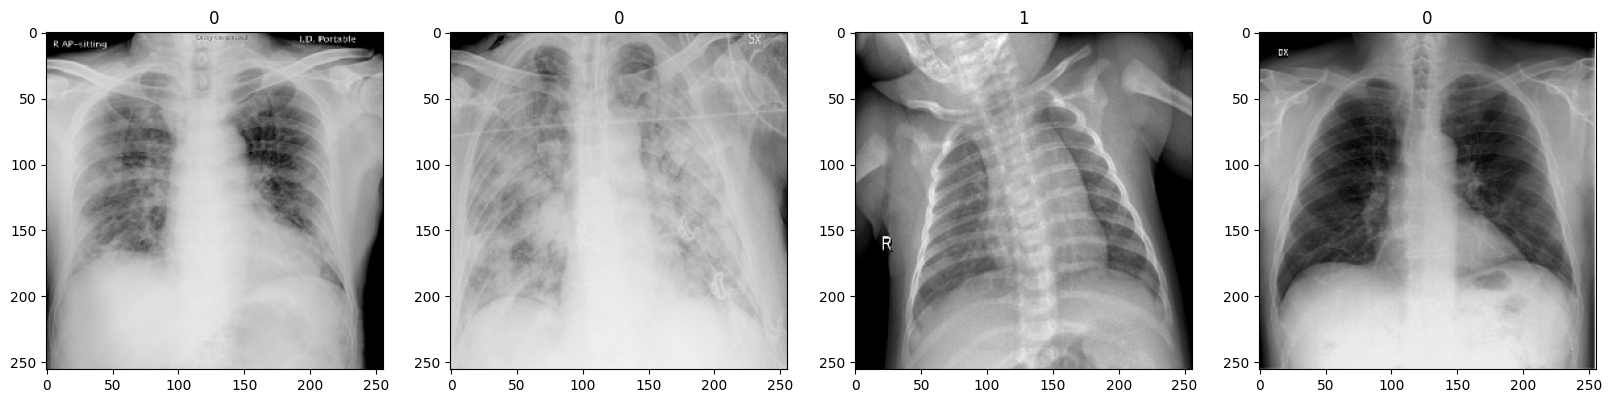

In [22]:
import numpy as np
from matplotlib import pyplot as plt
data = tf.keras.utils.image_dataset_from_directory('/content/Dataset/Train')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Found 60 files belonging to 2 classes.


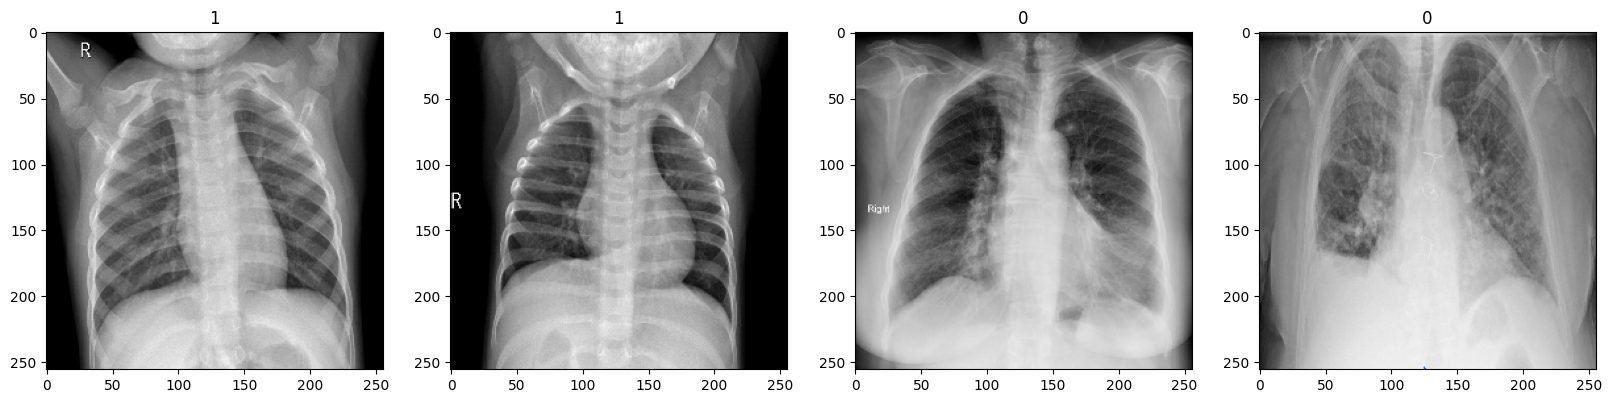

In [23]:
import numpy as np
from matplotlib import pyplot as plt
data = tf.keras.utils.image_dataset_from_directory('/content/Dataset/Val')
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [24]:
hist=model.fit_generator(train_generator,steps_per_epoch=8,epochs = 10,validation_data = validation_generator)

Epoch 1/10
8/8 [==============================] - 38s 5s/step - loss: 0.9469 - accuracy: 0.4688 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
8/8 [==============================] - 37s 5s/step - loss: 0.6961 - accuracy: 0.4531 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 36s 5s/step - loss: 0.6917 - accuracy: 0.6094 - val_loss: 0.6914 - val_accuracy: 0.9500
Epoch 4/10
8/8 [==============================] - 37s 5s/step - loss: 0.6796 - accuracy: 0.6328 - val_loss: 0.6554 - val_accuracy: 0.9333
Epoch 5/10
8/8 [==============================] - 37s 5s/step - loss: 0.5204 - accuracy: 0.7812 - val_loss: 0.3343 - val_accuracy: 0.9333
Epoch 6/10
8/8 [==============================] - 37s 5s/step - loss: 0.5508 - accuracy: 0.7734 - val_loss: 0.4066 - val_accuracy: 0.9667
Epoch 7/10
8/8 [==============================] - 36s 4s/step - loss: 0.2914 - accuracy: 0.8828 - val_loss: 0.2098 - val_accuracy: 0.9667
Epoch 8/10
8/8 [==================

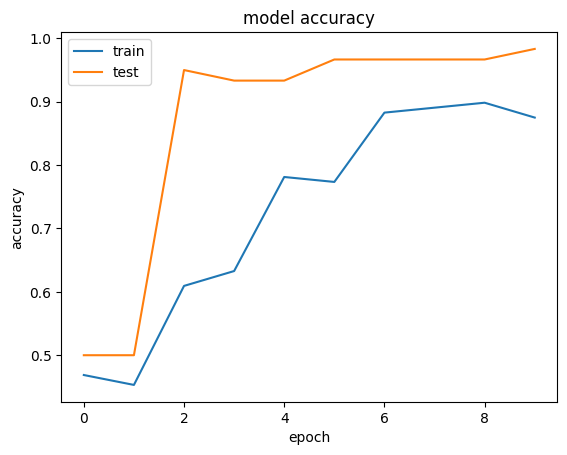

In [25]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

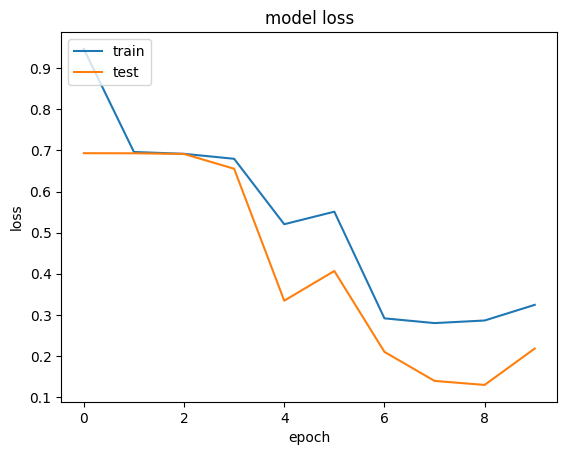

In [27]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [29]:
accuracy_score = model.evaluate(validation_generator)
print(accuracy_score)
print("Accuracy: {:.4f}%".format(accuracy_score[1] * 100))

print("Loss: ",accuracy_score[0])

4/4 [==============================] - 5s 967ms/step - loss: 0.1927 - accuracy: 0.9667
[0.19267025589942932, 0.9666666388511658]
Accuracy: 96.6667%
Loss:  0.19267025589942932


(1, 256, 256, 3)

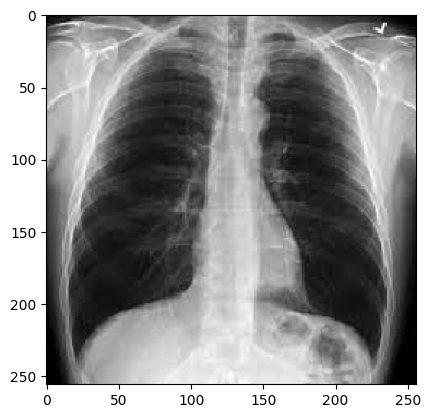

In [31]:
path="/content/1.jpg"
img=image.load_img(path,target_size=(256,256,3))
img=image.img_to_array(img)/255
plt.imshow(img)
img=np.array([img])
img.shape

In [32]:
import os
y_actual = []
y_test = []

for i in os.listdir("/content/Dataset/Val/Normal"):
    img = image.load_img("/content/Dataset/Val/Normal/"+i,target_size=(256,256))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    #p = model.predict_classes(img)
    p= (model.predict(img) > 0.5).astype("int32")
    y_test.append(p[0,0])
    y_actual.append(1)

1/1 [==============================] - 0s 68ms/step


In [33]:
for i in os.listdir("/content/Dataset/Val/Covid"):
    img = image.load_img("/content/Dataset/Val/Covid/"+i,target_size=(256,256))
    img = image.img_to_array(img)
    img = np.expand_dims(img,axis=0)
    #p = model.predict_classes(img)
    p= (model.predict(img) > 0.5).astype("int32")
    y_test.append(p[0,0])
    y_actual.append(0)

1/1 [==============================] - 0s 71ms/step


In [34]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_actual,y_test)
print(cm)


[[30  0]
 [ 1 29]]


In [36]:
import seaborn as sns
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ["Covid-19","Normal"]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap="plasma"):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 #color="white" if cm[i, j] > thresh else "black")
                 color="white")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[30  0]
 [ 1 29]]


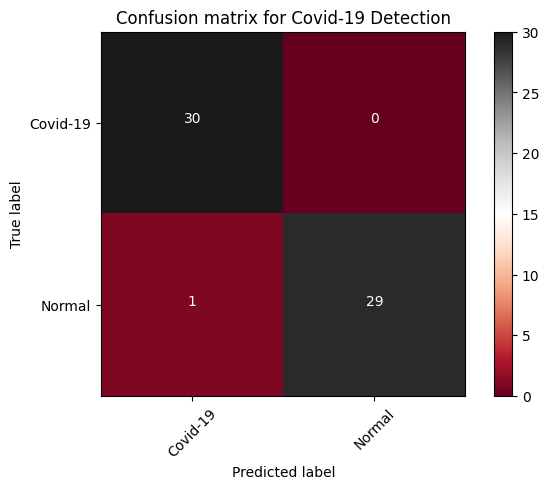

In [37]:
plt.figure()
plot_confusion_matrix(cm, classes=class_names,title='Confusion matrix for Covid-19 Detection',cmap="RdGy")

In [38]:
def predict_image(path):
    xtest_image = image.load_img(path, target_size = (256, 256))
    xtest_image = image.img_to_array(xtest_image)
    xtest_image = np.expand_dims(xtest_image, axis = 0)
    #results = model.predict_classes(xtest_image)
    results=(model.predict(xtest_image) > 0.5).astype("int32")
    # training_set.class_indices
    imggg = cv2.imread(path)
    #print("This Xray Image is of positive covid-19 patient")
    imggg = np.array(imggg)
    imggg = cv2.resize(imggg,(400,400))
    plt.imshow(imggg)
    # cv2_imshow(imggg)
    # print(results)
    if results[0][0] == 0:
        prediction = 'Positive For Covid-19'
    else:
        prediction = 'Negative for Covid-19'

    return prediction

1/1 [==============================] - 0s 72ms/step

The Prediction is:  Positive For Covid-19


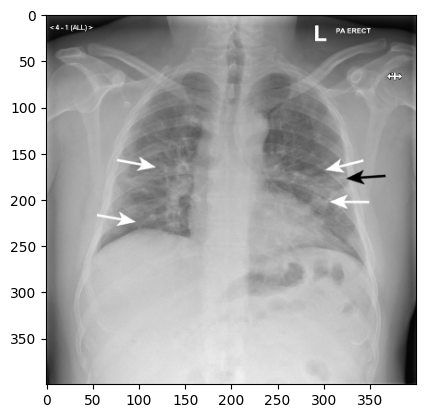

In [39]:
img_path="/content/F1.large.jpg"
predicted=predict_image(img_path)
print("\nThe Prediction is: ",predicted)